In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
from generate_analytics import GeneratedAnalytics
import numpy as np
import joypy

In [2]:
gen_an = GeneratedAnalytics("sqlite:///complexityweekend.sqlite")

Loaded 1788 messages
--> from 94 users
--> spanning 40 topics
Finished initializing analytics object.


In [15]:
def generate_plots(labels_list, numbers_list, title):
    plt.plot(labels_list,numbers_list)
    plt.title(title)
    plt.gca().axes.xaxis.set_visible(False)
    plt.show()
    plt.loglog(range(len(labels_list)),numbers_list)
    plt.title(title)
    plt.gca().axes.xaxis.set_visible(False)
    plt.show()
    plt.pie(numbers_list, labels=labels_list,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()
    
    
def generate_joyplot(df, by, column, 
                     sortby=None,
                     title="Distributions", 
                     figsize=(5,20), 
                     x_range=None, 
                     fade=False, 
                     kind="kde", 
                     labels=False, 
                     colormap=cm.Accent_r
                    ):
    # Makes "stacked" distributions using joyplot package. df is a pandas data frame.
    if sortby is not None:
        df = df.sort_values(by=sortby)
    fig, axes = joypy.joyplot(df, by=by, column=column, 
                              range_style='own', 
                              grid="y", 
                              linewidth=1.5, 
                              figsize=figsize, 
                              x_range=x_range, 
                              legend=False, 
                              title=title, 
                              labels=labels, 
                              colormap=colormap, 
                              fade=fade, 
                              kind=kind)

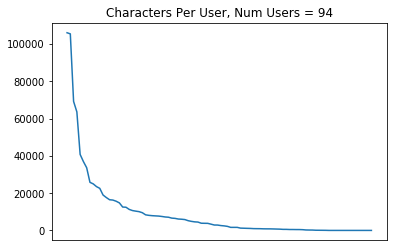

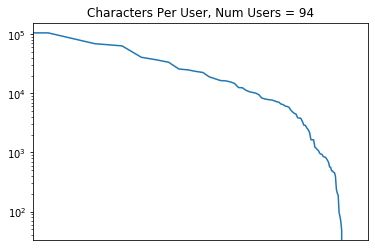

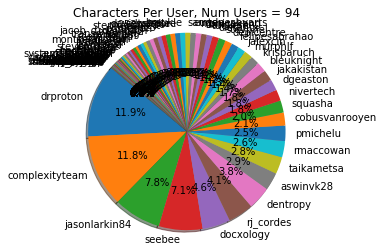

In [4]:
title = "Characters Per User, Num Users = " + str(len(gen_an.characters_per_user["user"]))
generate_plots(gen_an.characters_per_user["user"],gen_an.characters_per_user["characters_per_user"], title)

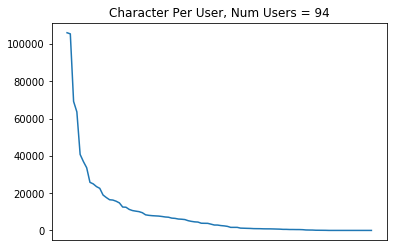

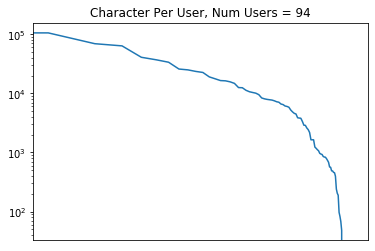

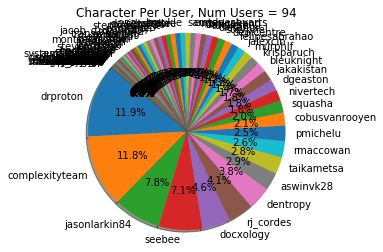

In [5]:
title = "Character Per User, Num Users = " + str(len(gen_an.characters_per_user["user"]))
generate_plots(gen_an.characters_per_user["user"],gen_an.characters_per_user["characters_per_user"], title)

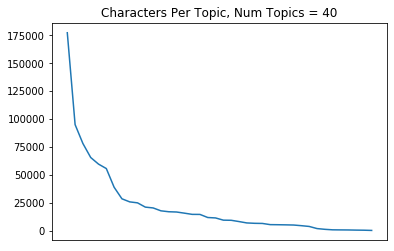

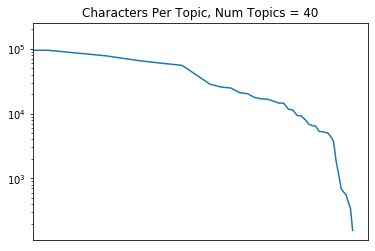

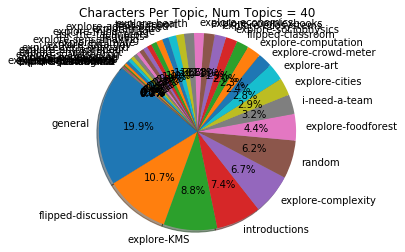

In [6]:
title = "Characters Per Topic, Num Topics = " + str(len(gen_an.characters_per_topic["topic"]))
generate_plots(gen_an.characters_per_topic["topic"],gen_an.characters_per_topic["characters_per_topic"], title)

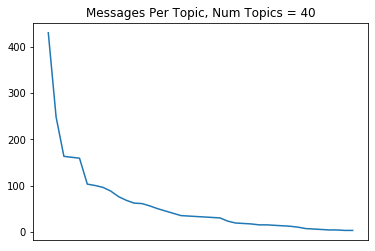

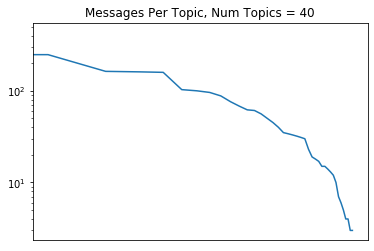

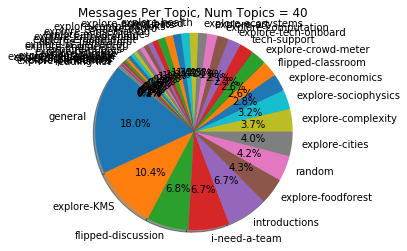

In [7]:
title = "Messages Per Topic, Num Topics = " + str(len(gen_an.messages_per_topic["topic"]))
generate_plots(gen_an.messages_per_topic["topic"],gen_an.messages_per_topic["messages_per_topic"], title)

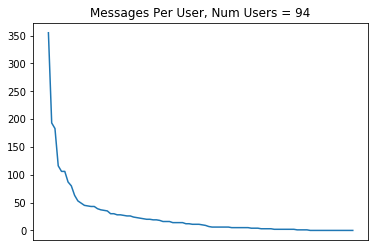

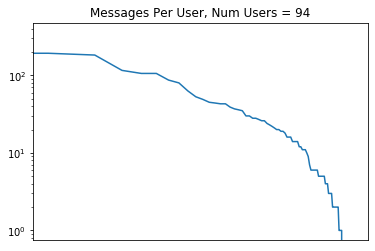

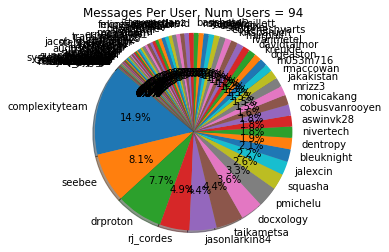

In [8]:
title = "Messages Per User, Num Users = " + str(len(gen_an.messages_per_user["messages_per_user"]))
generate_plots(gen_an.messages_per_user["user"],gen_an.messages_per_user["messages_per_user"], title)

In [9]:
# title = "Messages Per Topic, Num Topics = " + str(len(gen_an.messages_per_topic["topics_list"]))
# generate_plots(gen_an.number_users_per_topic["users_list"],gen_an.number_users_per_topic["topics_list"], title)

In [10]:
df = gen_an.get_message_data_frames(offset_time=1600000000)
df.head()

,user,msg_id,time,team,topic,text,word_count,characters_per_user,messages_per_user,characters_per_topic,messages_per_topic
0,tuckerc,5,789952,complexityweekend.oct2020,ask-the-facilitators,Hi there. Asking here and in #general :\nHow d...,21,8370,21,8098,15
1,drproton,6,790657,complexityweekend.oct2020,ask-the-facilitators,"Hi tucker, teams will form officially during a...",143,106122,183,8098,15
2,sunnyprakashp,9,860429,complexityweekend.oct2020,ask-the-facilitators,:wave:,1,204,3,8098,15
3,tuckerc,13,1135942,complexityweekend.oct2020,ask-the-facilitators,"Yes, thanks a ton",4,8370,21,8098,15
4,mrizz3,14,2429431,complexityweekend.oct2020,ask-the-facilitators,test,1,6115,37,8098,15


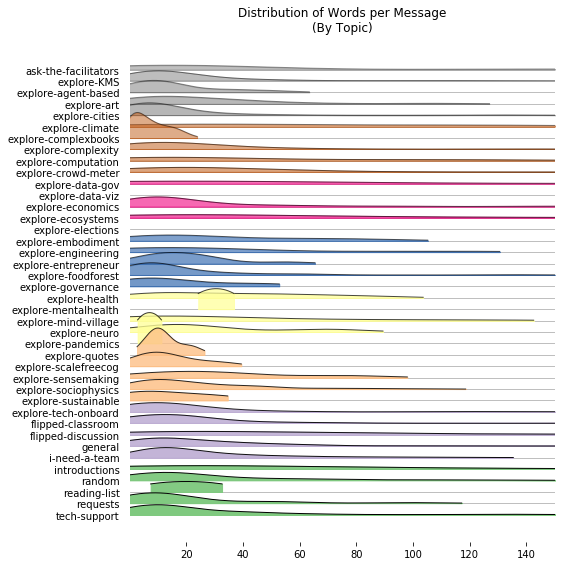

In [23]:
generate_joyplot(df, "topic", "word_count", 
                 sortby="characters_per_topic", 
                 title="Distribution of Words per Message\n(By Topic)", 
                 x_range=np.linspace(0,150,200), 
                 figsize=(8,8), 
                 kind="kde", 
                 fade=True)